![Logo ITESO](https://www.iteso.mx/image/journal/article?img_id=32346729&t=1662138449889)
# Detección de Neumonía con CNN
*Proyecto de Ciencia de Datos - O2022_MAF3660P*

Integrantes:
- Haces López, José Manuel - 734759 - Ing. Y Ciencia de Datos
- Navarro Silva, José Tonatiuh - 722399 - Ing. Financiera
____________________

## 1. Introducción
- A lo largo de este proyecto se buscará realizar una arquitectura de Redes Neuronales Convolucionales o CNN por sus siglas en inglés. Lo que se busca con ella es poder interpretar una radiografía pulmonar, y de esa forma poder reconocer patrones de Neumonía en los mismos.
- Se usará una base de que cuenta con casi 6,000 imágenes de pulmones, las cuales se identifican en 2 clases, Normal o no infectado y Pneumonia o infectado (se muestran dos tipos de Neumonía, por bacteria o por virus).
  - Los datos se obtuvieron de Kaggle, del usuario 'Alif Rahman'.
  - [Link al Dataset](https://www.kaggle.com/datasets/alifrahman/chestxraydataset?resource=download)

## 2. Antecedentes
- La Clinica Mayo define la Neumonía como, "La neumonía es una infección que inflama los sacos aéreos de uno o ambos pulmones. Los sacos aéreos se pueden llenar de líquido o pus (...), lo que provoca tos con flema o pus, fiebre, escalofríos y dificultad para respirar. (...). La neumonía puede variar en gravedad desde suave a potencialmente mortal. Es más grave en bebés y niños pequeños, personas mayores a 65 años, y personas con problemas de salud o sistemas inmunitarios debilitados." (Neumonía - Síntomas y causas - Mayo Clinic, 2021)

## 3. Objetivos
- Conseguir suficientes imágenes para poder realizar el entrenamiento de manera adecuada.
- Realizar una arquitectura de CNN capaz de identificar de manera eficiente los patrones de Neumonía.
- Crear una API para poder ejecutar nuestro modelo como un Servicio.
- Crear una imagen de Docker para poder ejecutarlo en diferentes instancias.
- Subirlo a la nube para poder ejecutarlo de manera remota.


## 4. Planteamiento del problema
- Se tienen registros del año 460 a.C. en donde Hipócrates describe los síntomas de la enfermedad, lo que nos da a entender que este estado de salud lleva ya varios milenios con nosotros; sin embargo, no la hemos podido erradicar del todo.
- La Neumonía afecta a todas las edades; sin embargo, tenemos dos grupos de riesgo, los niños pequeños y adultos mayores. Lo que ocasiona muchas muertes por esta enfermedad, según Statita (2022) en México en el año de 2020 murieron alrededor de 56,899 personas por Neumonía. Es por ello que mientras más rápido se puedan encontrar indicios de la enfermedad es mucho mejor, para así poder realizar un buen tratamiento de esta.


## 5. EDA

### 5.0. Librerias

In [1]:
import data as dt
import main as mn
import visualizations as vz
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### 5.1. Balance Inicial de clases

In [2]:
mn.sets

{'test_neumonia': 390,
 'test_normal': 234,
 'train_neumonia': 3875,
 'train_normal': 1341}

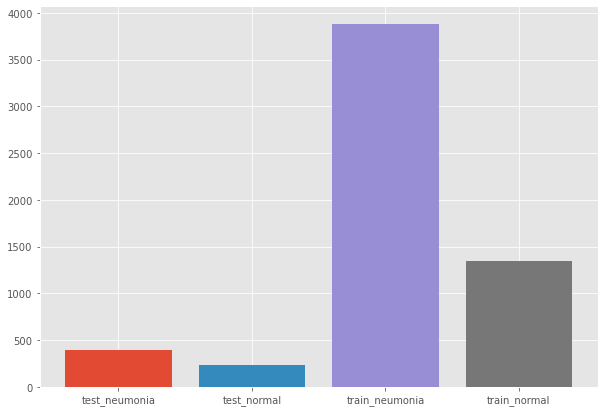

In [4]:
plt.figure(figsize=(10,7))
[plt.bar(key,value) for (key,value) in zip(mn.sets.keys(),mn.sets.values())];

In [5]:
print(f"El set de train representa el {mn.per_train}% del total de nuestras imágenes y el set de test representa el \
{np.round(100-mn.per_train,2)}%")

El set de train representa el 89.32% del total de nuestras imágenes y el set de test representa el 10.68%


#### 5.1.1. Balance inicial en el set de train

In [6]:
print(f"En el set de train las imagenes donde se presenta la neumania representa el {mn.train_neumonia_prop}% y los casos donde el pulmón está bien representan el {np.round(100-mn.train_neumonia_prop,4)}%")

En el set de train las imagenes donde se presenta la neumania representa el 74.29% y los casos donde el pulmón está bien representan el 25.71%


#### 5.1.2. Balance inicial en el set de test

In [8]:
print(f"En el set de train las imagenes donde se presenta la neumania representa el {mn.test_neumonia_prop}% y los casos donde el pulmón está bien representan el {np.round(100-mn.test_neumonia_prop,4)}%")

En el set de train las imagenes donde se presenta la neumania representa el 62.5% y los casos donde el pulmón está bien representan el 37.5%


![Ejemplos](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4298011%2F092cd8598575c60c27fedad4d7998e66%2FjZqpV51.png?generation=1600531874588151&alt=media)

## 6. Dataset
- El dataset cuenta con 5,840 radiografías pulmonares, las cuales se dividen en 2 clases:
  - Normal
  - Pneumonia (infectado)
- El archivo general se encuentra en la carpeta 'data' bajo el nombre de 'chest_xray.zip', el cual tiene un tamaño de 1.13 GB.
- El archivo se dividio en 2 directorios con las siguientes jerarquías:
  - Train (80% de las imágenes - 4672)
    - Normal
    - Pneumonia
  - Test (20% de las imágenes - 1168)
    - Normal
    - Pneumonia


## 7. Dataset final a trabajar
- El dataset a trabajar serán las imágenes que se encuentran en los directorios que se mencionaron anteriormente (train y test).